In this notebook, we will exlpore Movies dataset and ask some questions and try to answer them with the help of matplotlib visualizations and pandas operations.

We will try to answer the following questions:

What is the movie with the highest Popularity rate? And what kind is it?

What year was the largest number of films produced?

What is most of the film genre?

What kind of movies take the highest rating?

Which movie is more popular? Which movie is less popular? In my project I am going to cover folllowing mathematical operations : Arithmetic Mean, Median, Weighted Mean, Mode, Variance, and Standard Deviation

In [ ]:
import pandas as pd

# Specify the file path to your CSV file
file_path = '/content/mymoviedb.csv'

# Read the CSV file into a DataFrame
try:
    movies_df = pd.read_csv(
        file_path,
        encoding='utf-8',    # Adjust encoding if needed (try 'latin1' if UTF-8 fails)
        quotechar='"',       # Ensure quoted fields are parsed correctly
        delimiter=',',       # Specify the comma as the field delimiter
        engine='python'      # Use the Python engine for more flexibility
    )

    # Display the first few rows to verify the content
    print("Dataset loaded successfully!")
    print(movies_df.head())  # Display the first 5 rows
    print("\nDataset Information:")
    print(movies_df.info())  # Show dataset structure and types

except Exception as e:
    print("An error occurred while loading the dataset:")
    print(e)

Dataset loaded successfully!
  Release_Date                    Title  \
0   2021-12-15  Spider-Man: No Way Home   
1   2022-03-01               The Batman   
2   2022-02-25                  No Exit   
3   2021-11-24                  Encanto   
4   2021-12-22           The King's Man   

                                            Overview  Popularity Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954       8940   
1  In his second year of fighting crime, Batman u...    3827.658       1151   
2  Stranded at a rest stop in the mountains durin...    2618.087        122   
3  The tale of an extraordinary family, the Madri...    2402.201       5076   
4  As a collection of history's worst tyrants and...    1895.511       1793   

  Vote_Average Original_Language                               Genre  \
0          8.3                en  Action, Adventure, Science Fiction   
1          8.1                en            Crime, Mystery, Thriller   
2          6.3       

In [ ]:
# INSPECTING THE DATAFRAME
movies_df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [ ]:
# CLEANING DATA
# Get the column names of the dataset
columns = movies_df.columns
columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [ ]:
# CLEANING DATA CHECKING MISSING VALUES
# Check for any remaining missing values
movies_df.isnull().sum()

,0
Release_Date,0
Title,9
Overview,9
Popularity,10
Vote_Count,10
Vote_Average,10
Original_Language,10
Genre,11
Poster_Url,11


In [ ]:
# CLEANING DATA / Drop rows where any column has missing values
movies_df.dropna(inplace=True)

In [ ]:
# CLEANING DATA / Check for missing values again
movies_df.isnull().sum()

,0
Release_Date,0
Title,0
Overview,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,0
Genre,0
Poster_Url,0


In [ ]:
# Check for duplicates in the dataset
duplicate_rows = movies_df[movies_df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 0


In [ ]:
# PREPARING DATA FOR VISUALISATION

# Normalize the Popularity for better visualization
movies_df['Popularity'] = movies_df['Popularity'] / 1000

# Convert Release_Date to datetime (if it's not already in the correct format) and extract the year
movies_df['Release_Date'] = pd.to_datetime(movies_df['Release_Date'], errors='coerce')
movies_df['Year'] = movies_df['Release_Date'].dt.year

# Print the updated DataFrame
print(movies_df.head())

  Release_Date                    Title  \
0   2021-12-15  Spider-Man: No Way Home   
1   2022-03-01               The Batman   
2   2022-02-25                  No Exit   
3   2021-11-24                  Encanto   
4   2021-12-22           The King's Man   

                                            Overview  Popularity Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5.083954       8940   
1  In his second year of fighting crime, Batman u...    3.827658       1151   
2  Stranded at a rest stop in the mountains durin...    2.618087        122   
3  The tale of an extraordinary family, the Madri...    2.402201       5076   
4  As a collection of history's worst tyrants and...    1.895511       1793   

  Vote_Average Original_Language                               Genre  \
0          8.3                en  Action, Adventure, Science Fiction   
1          8.1                en            Crime, Mystery, Thriller   
2          6.3                en                  

<ipython-input-10-c4f01dcb6923>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Popularity', y='Title', data=top_movies, palette='viridis')


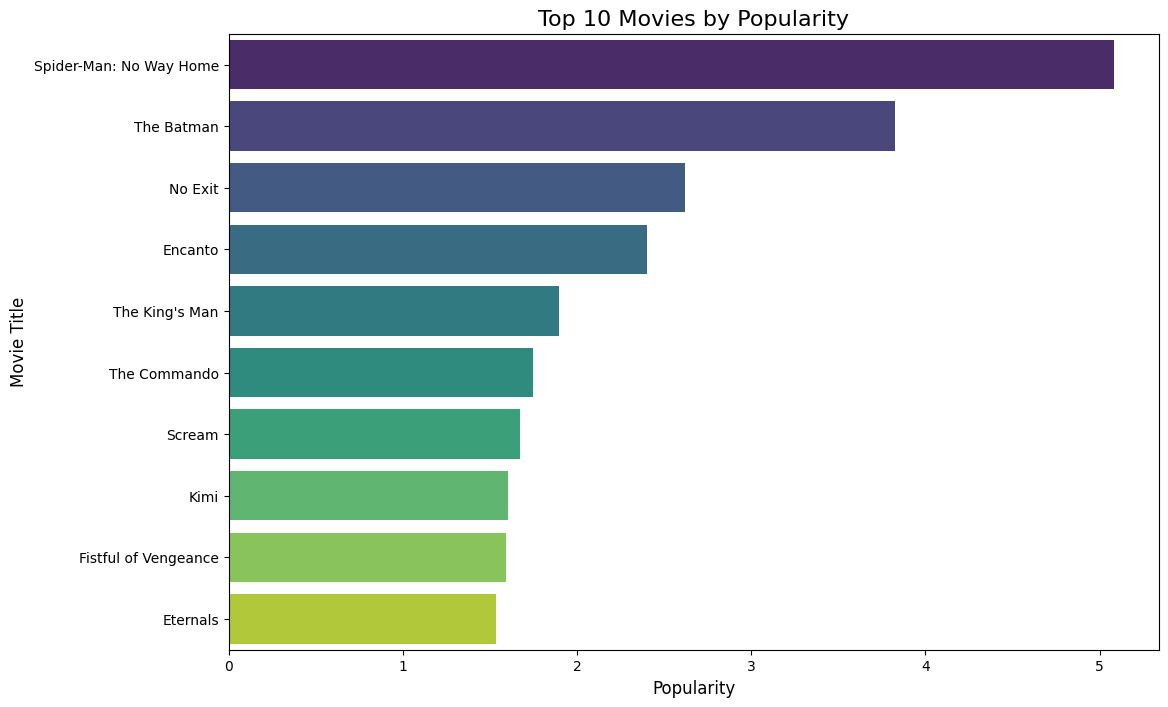

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the dataset by Popularity in descending order
movies_df_sorted = movies_df.sort_values(by='Popularity', ascending=False)

# Select top 10 most popular movies
top_movies = movies_df_sorted.head(10)

# Create a bar plot for the top 10 most popular movies
plt.figure(figsize=(12, 8))  # Setting the figure size
sns.barplot(x='Popularity', y='Title', data=top_movies, palette='viridis')

# Add title and labels
plt.title('Top 10 Movies by Popularity', fontsize=16)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)

# Display the chart
plt.show()

In [ ]:
# What is the movie with the highest Popularity rate? And what kind is it?
import pandas as pd

# Reading the CSV file with error handling
try:
    data = pd.read_csv(
        "mymoviedb.csv",
        encoding='utf-8',      # Adjust encoding (use 'latin1' if UTF-8 fails)
        on_bad_lines='skip',   # Skip problematic lines (for recent pandas versions)
        engine='python'        # Use the Python engine (more flexible)
    )
    print("CSV file loaded successfully!")

    # Divide the Popularity column by 1000
    data['Popularity'] = data['Popularity'] / 1000

    # Sorting by the Popularity column (after division)
    data.sort_values("Popularity", ascending=False, inplace=True)

    # Displaying the most popular movie
    most_popular_movie = data.iloc[0]
    print(f"The movie with the highest Popularity is: {most_popular_movie['Title']}")
    print(f"Genre: {most_popular_movie['Genre']}")
    print(f"Popularity Rate: {most_popular_movie['Popularity']}")

except Exception as e:
    print(f"Error loading the CSV file: {e}")

CSV file loaded successfully!
The movie with the highest Popularity is: Spider-Man: No Way Home
Genre: Action, Adventure, Science Fiction
Popularity Rate: 5.083953999999999


In [ ]:
import numpy as np
import pandas as pd

#'movies_df' DataFrame is already loaded

# Ensure 'Popularity' and 'Vote_Count' columns are numeric and handle missing values
movies_df['Popularity'] = pd.to_numeric(movies_df['Popularity'], errors='coerce')
movies_df['Vote_Count'] = pd.to_numeric(movies_df['Vote_Count'], errors='coerce')

# Remove rows with NaN values in 'Popularity' or 'Vote_Count'
movies_df = movies_df.dropna(subset=['Popularity', 'Vote_Count'])

# To calculate the Arithmetic Mean, Median, Weighted Mean, Mode, Variance, and Standard Deviation for 'Popularity'

# Calculate Arithmetic Mean
mean_popularity = movies_df['Popularity'].mean()
print("\nMean: ", mean_popularity)

# Calculate Median
median_popularity = movies_df['Popularity'].median()
print("\nMedian: ", median_popularity)

# Calculate Weighted Mean (using 'Vote_Count' as weight)
weighted_mean_popularity = np.average(movies_df['Popularity'], weights=movies_df['Vote_Count'])
print("\nWeighted Mean: ", weighted_mean_popularity)

# Calculate Mode
mode_popularity = movies_df['Popularity'].mode()
print("\nMode: ", mode_popularity.values)

# Calculate Variance
variance_popularity = movies_df['Popularity'].var()
print("\nVariance: ", variance_popularity)

# Calculate Standard Deviation
std_dev_popularity = movies_df['Popularity'].std()
print("\nStandard Deviation: ", std_dev_popularity)


Mean:  0.04032395084469774

Median:  0.021195

Weighted Mean:  0.06836860728826817

Mode:  [0.014696]

Variance:  0.011854709020778995

Standard Deviation:  0.10887933238580678


In [ ]:
# 2.What year was the largest number of films produced?

# Group by 'Year' and count the number of movies produced (by counting 'Title')
movies_produced_per_year = movies_df.groupby('Year')['Title'].count().reset_index()
print(movies_produced_per_year)

# Find the year with the largest number of movies produced

     Year  Title
0    1902      1
1    1920      1
2    1921      2
3    1922      2
4    1925      1
..    ...    ...
97   2020    453
98   2021    714
99   2022    208
100  2023      8
101  2024      1

[102 rows x 2 columns]


In [ ]:
# CREATING A DATAFRAME TO SHOW THE LARGEST NUMBER OF MOVIES PRODUCED

import pandas as pd

# intialise data of lists.
data = {'Year':['2020', '2021', '2022', '2023', '2024'],
        'Produced Movies':[250, 567, 144, 5, 1]}

# Create DataFrame
df = pd.DataFrame(data)

# Print the output.
print(df)

   Year  Produced Movies
0  2020              250
1  2021              567
2  2022              144
3  2023                5
4  2024                1


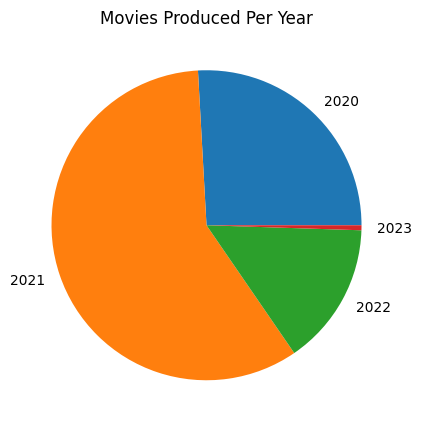

In [ ]:
# CREATING PIE CHART TO SHOW THE LAGEST NUMBER OF MOVIES PER YEAR
# Import libraries
from matplotlib import pyplot as plt
import numpy as np

# Creating dataset
years = ['2020', '2021', '2022', '2023']
data = [250, 567, 144, 5,]  # Number of movies produced

# Creating plot
fig = plt.figure(figsize=(5, 12))  # Adjusting figure size
plt.pie(data, labels=years)  # Plotting the pie chart

# Add a title
plt.title('Movies Produced Per Year')

# Show plot
plt.show()

In [ ]:
# 3.What is most of the film genre?

movies_df['Genre'].value_counts()[movies_df['Genre'].value_counts() == movies_df['Genre'].value_counts().max()]

,count
Genre,
Drama,466


In [ ]:
# 3.top 10 common genres
movies_df['Genre'].value_counts().head(10)

,count
Genre,
Drama,466
Comedy,403
"Drama, Romance",248
Horror,238
"Horror, Thriller",199
"Comedy, Romance",196
Documentary,139
"Comedy, Drama",137
"Action, Thriller",125


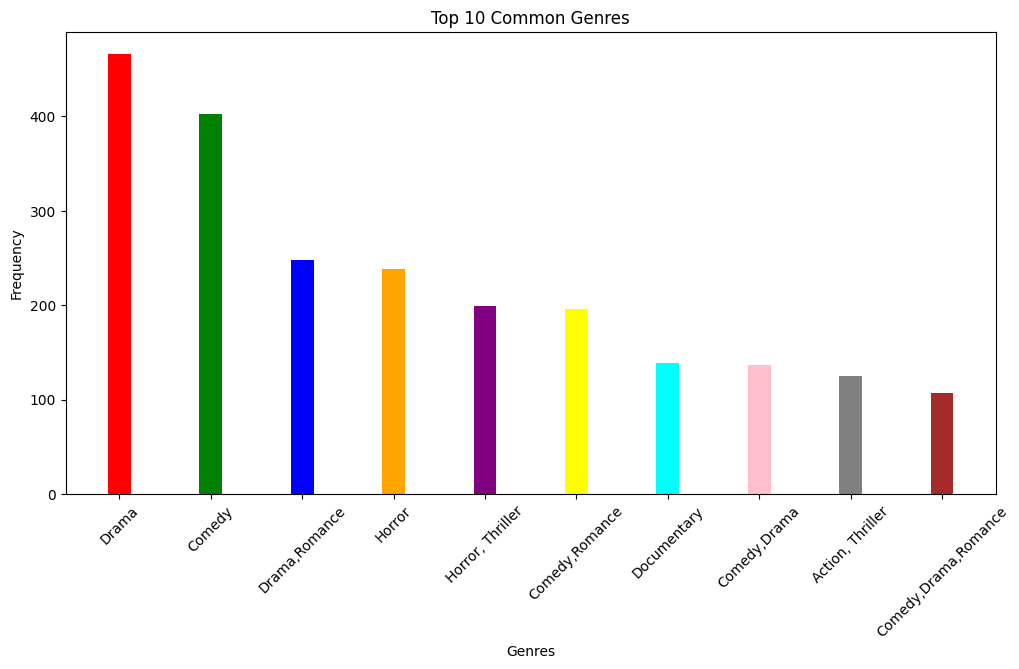

In [ ]:
# CREATING CHART
import matplotlib.pyplot as plt

# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# heights of bars (frequencies)
height = [466, 403, 248, 238, 199, 196, 139, 137, 125, 107]

# labels for bars
tick_label = ['Drama', 'Comedy', 'Drama,Romance', 'Horror', 'Horror, Thriller',
              'Comedy,Romance', 'Documentary', 'Comedy,Drama',
              'Action, Thriller', 'Comedy,Drama,Romance']

# Adjust figure size to increase space for x-axis
plt.figure(figsize=(12, 6))  # Width=12, Height=6

# plotting a bar chart
plt.bar(left, height, tick_label=tick_label, width=0.25,
        color=['red', 'green', 'blue', 'orange', 'purple',
               'yellow', 'cyan', 'pink', 'gray', 'brown'])

# naming the x-axis
plt.xlabel('Genres')
# naming the y-axis
plt.ylabel('Frequency')
# plot title
plt.title('Top 10 Common Genres')

# rotating x-tick labels for better readability
plt.xticks(rotation=45)

# function to show the plot
plt.show()


<ipython-input-39-f2d56116dba4>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vote_Average', y='Genre', data=top_movies, palette='coolwarm')


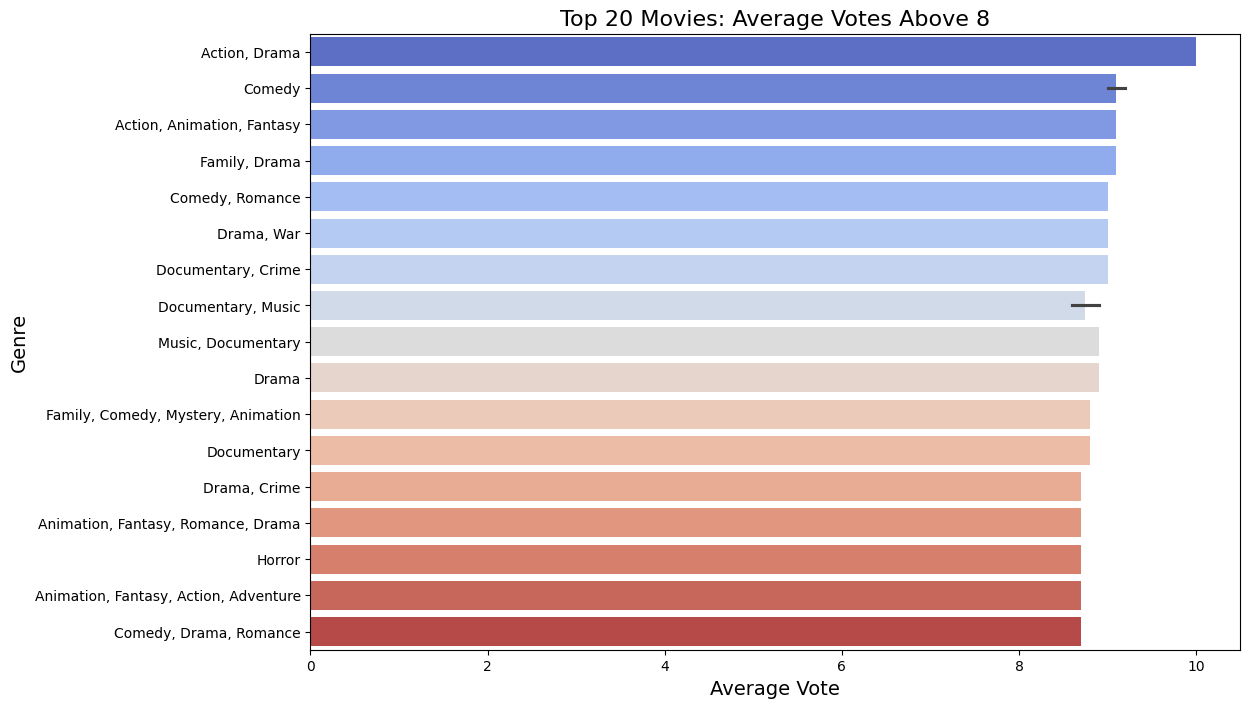

In [ ]:

# 5.What kind of movies take the highest rating?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Vote_Average' to numeric, handling errors
movies_df['Vote_Average'] = pd.to_numeric(movies_df['Vote_Average'], errors='coerce')

# Drop rows with NaN in 'Vote_Average'
movies_df = movies_df.dropna(subset=['Vote_Average'])

# Filter movies with a vote average greater than 8
filtered_movies = movies_df[movies_df['Vote_Average'] > 8]

# Sort the filtered data by highest rankings
df_sorted = filtered_movies.sort_values(by='Vote_Average', ascending=False)

# Select the top 20 highest-ranked movies
top_movies = df_sorted.head(20)

# Create a horizontal barplot
plt.figure(figsize=(12, 8))  # Adjusting figure size for better readability
sns.barplot(x='Vote_Average', y='Genre', data=top_movies, palette='coolwarm')

# Add a plot title and labels
plt.title('Top 20 Movies: Average Votes Above 8', fontsize=16)
plt.xlabel('Average Vote', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.show()





<ipython-input-68-8f5a1969f817>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='Popularity', data=top_movies, palette='mako')


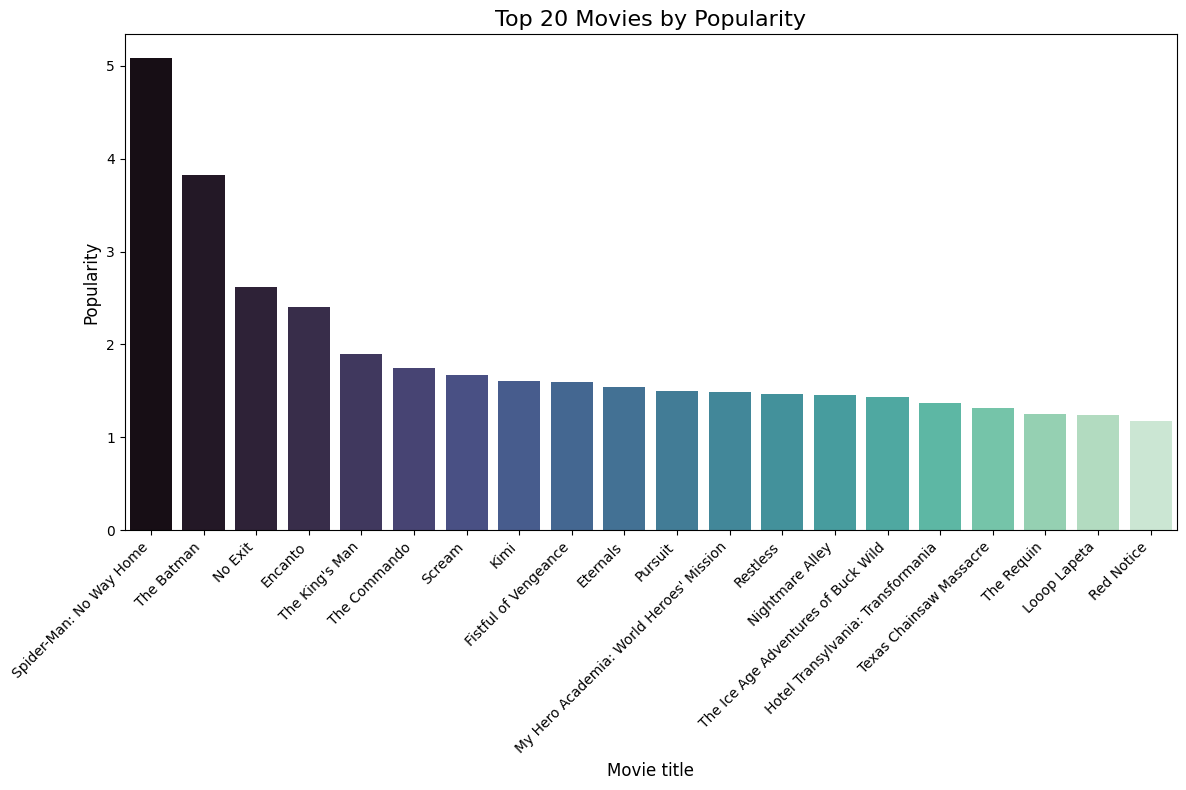

In [ ]:
# 6.1 Which movie is more popular?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#'movies_df' is already loaded with 'Title' and 'Popularity' columns
# Sort the dataset by Popularity in descending order
movies_df_sorted = movies_df.sort_values(by='Popularity', ascending=False)

# Select the top 20 most popular movies
top_movies = movies_df_sorted.head(20)

# Create a bar plot for the top 10 most popular movies
plt.figure(figsize=(12, 8))  # Adjusting the figure size

sns.barplot(x='Title', y='Popularity', data=top_movies, palette='mako')

# Add title and labels
plt.title('Top 20 Movies by Popularity', fontsize=16)
plt.xlabel('Movie title', fontsize=12)
plt.ylabel('Popularity', fontsize=12)

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust the layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()





<ipython-input-88-469469674388>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='Original_Popularity', data=least_popular_movies, palette='mako')


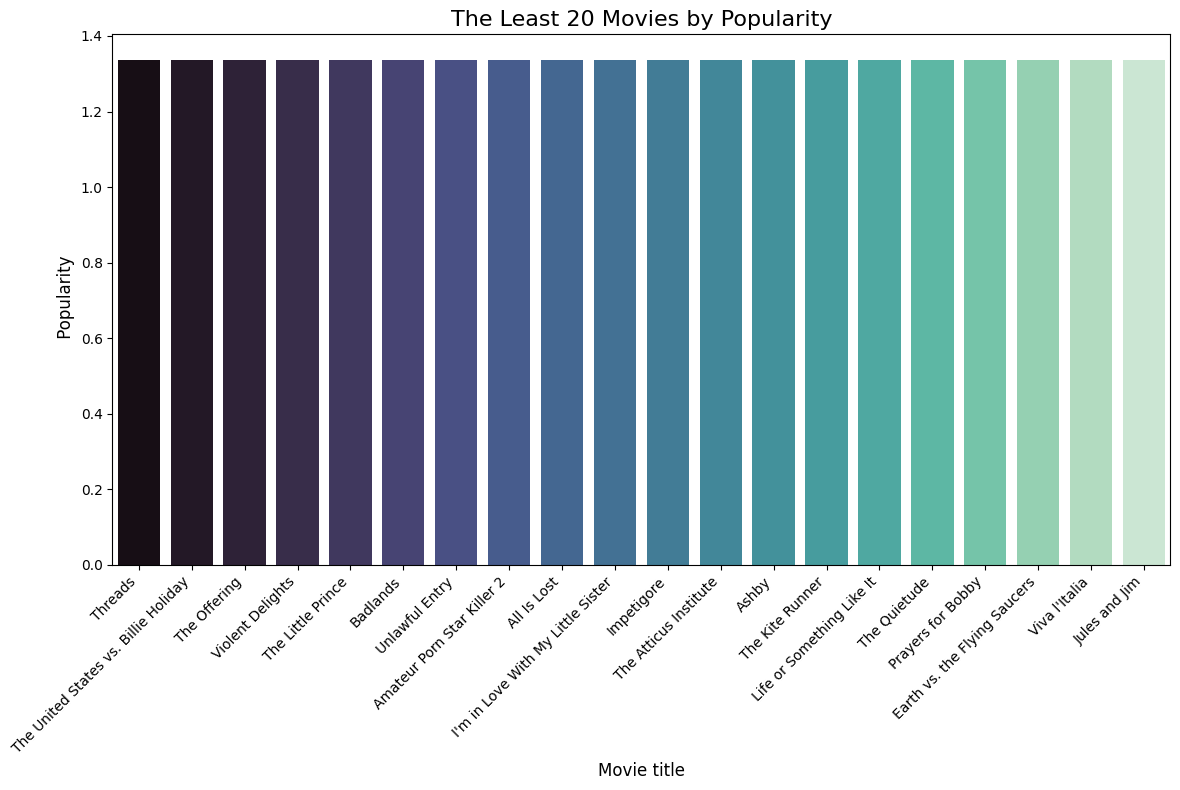

In [ ]:
# 6.2 Which movie is less popular?

# popularity was divided by 1000, so we reverse this by multiplying by 100
movies_df['Original_Popularity'] = movies_df['Popularity'] * 100

# Now, proceed with sorting and plotting using the original popularity values
movies_df_sorted_ascending = movies_df.sort_values(by='Popularity', ascending=True)
least_popular_movies = movies_df_sorted_ascending.head(20)

# Create a bar plot for the least 20 popular movies with original popularity values
plt.figure(figsize=(12, 8))  # Adjusting the figure size

sns.barplot(x='Title', y='Original_Popularity', data=least_popular_movies, palette='mako')

# Add title and labels
plt.title('The Least 20 Movies by Popularity', fontsize=16)
plt.xlabel('Movie title', fontsize=12)
plt.ylabel(' Popularity', fontsize=12)

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust the layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()


